# **Karamoja Food Security Analysis**

---


Authors: Shirley Muiruri, Ashley Simiyu.

---



## **Overview**
This project focuses on a comprehensive analysis of the yield of two essential staple crops, sorghum and maize, within the Karamoja region of Uganda. The analysis is conducted at both the district and subcounty levels to provide granular insights into agricultural productivity across the region. This work is a crucial step towards developing a food security monitoring tool for NGOs operating in Karamoja, utilizing satellite imagery-based yield measurements provided by Dalberg Data Insights (DDI). By examining crop yields alongside relevant demographic and spatial data, this project aims to support informed decision-making regarding food security interventions and strategies in the area.This project analyzes the yield of two main staple crops(sorghum and maize) of the Karamoja region of Uganda by district and subcounty.

## **Business Problem**
Dalberg Data Insights (DDI) has been requested to develop a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja. To do so, Dalberg Data Insights developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images.
The task is to develop an interactive visualization tool of the results for this first crop season. This visualization tool developed will be used as a first mockup of the Food Security Monitoring tool that DDI will develop for the NGO.

## Data Source and Exploration

The data for this project was provided by Dalberg Data Insights (DDI) and includes:

*   Crop yield population data for both districts and subcounties in the Karamoja region of Uganda.
*   Crop maps for both maize and sorghum.
*   Spatial data for Uganda districts and subcounties.

**Data Exploration Steps Performed:**

1.  **Loading Data:** Loaded the spatial files (Uganda Districts and Subcounties shapefiles, Crop Type Map shapefiles for Maize and Sorghum) and CSV files (District and Subcounty Crop Yield and Population data).
2.  **Initial Inspection:** Displayed the head of the district and subcounty CSV files and checked their information (data types, non-null counts).
3.  **Merging Dataframes:** Attempted to identify common columns between the spatial and tabular dataframes for merging, but found no common identifiers.
4.  **Missing Value Check:** Checked for missing values in the district and subcounty CSV files, finding none.
5.  **Summary Statistics:** Generated and analyzed summary statistics for both district and subcounty data to understand the distribution and key characteristics of the numerical variables (population, area, yields, crop areas, and production).
6.  **Visualizations:** Created histograms to visualize the distribution of numerical variables, bar plots to compare population, sorghum yield, and maize yield across districts and top subcounties, and scatter plots to explore relationships between variables like yield vs. area and population vs. crop area.
7.  **Correlation Analysis:** Calculated and visualized correlation matrices for both district and subcounty numerical data to understand the relationships between different variables.

These steps have provided valuable insights into the data, highlighting variations, distributions, and correlations between key indicators related to crop yield, population, and area in the Karamoja region.

### Data Understanding

Dalberg Data Insights requires an analysis of the data provided that will be used as a first mockup of the Food Security Monitoring Tool. The data provided contains information on crop yield population for both districts and subcounties, crop maps for both maize and sorghum and uganda districts and subcounties.

In [ ]:
#Install library
!pip install geopandas

In [ ]:
#import the necessary packages
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
#load spatial files
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'
district_shp = gpd.read_file("Uganda_Districts.shp")
subcounty_shp = gpd.read_file("Uganda_Subcounties.shp")

#load csv files
district_csv = pd.read_csv("Uganda_Karamoja_District_Crop_Yield_Population.csv")
subcounty_csv = pd.read_csv("Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")

#load crop type map
crop_map_maize = gpd.read_file("Crop_Type_Map_Maize.shp")
crop_map_sorghum = gpd.read_file("Crop_Type_Map_Sorghum.shp")

In [ ]:
district_csv.head()


,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
district_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 748.0+ bytes


In [ ]:
subcounty_csv.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [ ]:
subcounty_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


##Merging Dataframes


We are inspecting all the uploaded files to determine whether they have any common columns so we can merge them.


In [ ]:
print(district_shp.columns)
print(district_csv.columns)
print(subcounty_shp.columns)
print(subcounty_csv.columns)
print(crop_map_maize.columns)
print(crop_map_sorghum.columns)

Index(['geometry'], dtype='object')
Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')
Index(['geometry'], dtype='object')
Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')
Index(['geometry'], dtype='object')
Index(['geometry'], dtype='object')


Dataframes cannot be merged because they have no common identifiers.

###Checking for missing values

In [ ]:
district_csv.isnull().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
subcounty_csv.isnull().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


There are no missing values in both district_csv and subcounty_csv

####Summary Statistics

In [ ]:
district_csv.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


* **Population (POP):** The population varies across the 7 districts,
ranging from about 90,000 to over 627,000. The average population is around 215,000.
* **Area:** The area of the districts varies widely, from approximately 1.64 billion to 7.37 billion square units (units are not specified in the data). The average area is about 3.96 billion square units.
* **Sorghum Yield (S_Yield_Ha):** Sorghum yield per hectare ranges from 128 to 449. The average sorghum yield is around 269.
* **Maize Yield (M_Yield_Ha):** Maize yield per hectare is higher than sorghum, ranging from 355 to 1297. The average maize yield is around 986.
* **Crop Area (Crop_Area_Ha):** The total crop area per district ranges from about 5,470 to 53,032 hectares, with an average of around 21,094 hectares.
* **Sorghum Area (S_Area_Ha):** The area dedicated to sorghum cultivation is larger than that for maize, ranging from about 2,973 to 50,247 hectares, with an average of around 16,737 hectares.
* **Maize Area (M_Area_Ha):** The area dedicated to maize cultivation ranges from about 1,190 to 7,394 hectares, with an average of around 3,984 hectares.
* **Sorghum** Production (S_Prod_Tot): Total sorghum production varies greatly, from about 607,000 to over 16.6 million units ( units are not specified). The average total sorghum production is around 4.87 million.
* **Maize Production (M_Prod_Tot):** Total maize production also varies, from about 422,000 to over 8.12 million units. The average total maize production is around 4.09 million.

In [ ]:
subcounty_csv.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824456,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


* **Population (POP):** The population across the 52 subcounties varies greatly, ranging from a minimum of 1,418 to a maximum of 100,919. The average population is around 28,934. The large standard deviation 20,865 relative to the mean indicates a wide spread in population size among subcounties.
* **Area:** The area of the subcounties also shows significant variation, from approximately 2.12 million to 2.07 billion square units. The average area is about 533 million square units.
* **Sorghum Yield (S_Yield_Ha):** Sorghum yield per hectare ranges from about 108 to 560, with an average of around 274.
* **Maize Yield (M_Yield_Ha):** Maize yield per hectare has a minimum of 0 and a maximum of nearly 1400, with an average of about 940. The minimum of 0 suggests some subcounties may not cultivate maize or have reported zero yield.
* **Crop Area (Crop_Area_Ha):** The total crop area per subcounty ranges from 0.17 hectares to over 13,500 hectares, with an average of around 2,840 hectares. The large standard deviation 3,110 indicates considerable variation in the total area under cultivation.
* **Sorghum Area (S_Area_Ha):** The area dedicated to sorghum cultivation varies from 0.13 to over 12,900 hectares, with an average of around 2,253 hectares.
* **Maize Area (M_Area_Ha):** The area dedicated to maize cultivation ranges from 0 to over 3,800 hectares, with an average of around 536 hectares.
* **Sorghum Production (S_Prod_Tot):** Total sorghum production varies from about 17 to over 4.5 million units, with an average of around 655,000.
* **Maize Production (M_Prod_Tot):** Total maize production varies from 0 to over 4.3 million units, with an average of around 550,000.

## Histograms for District Data

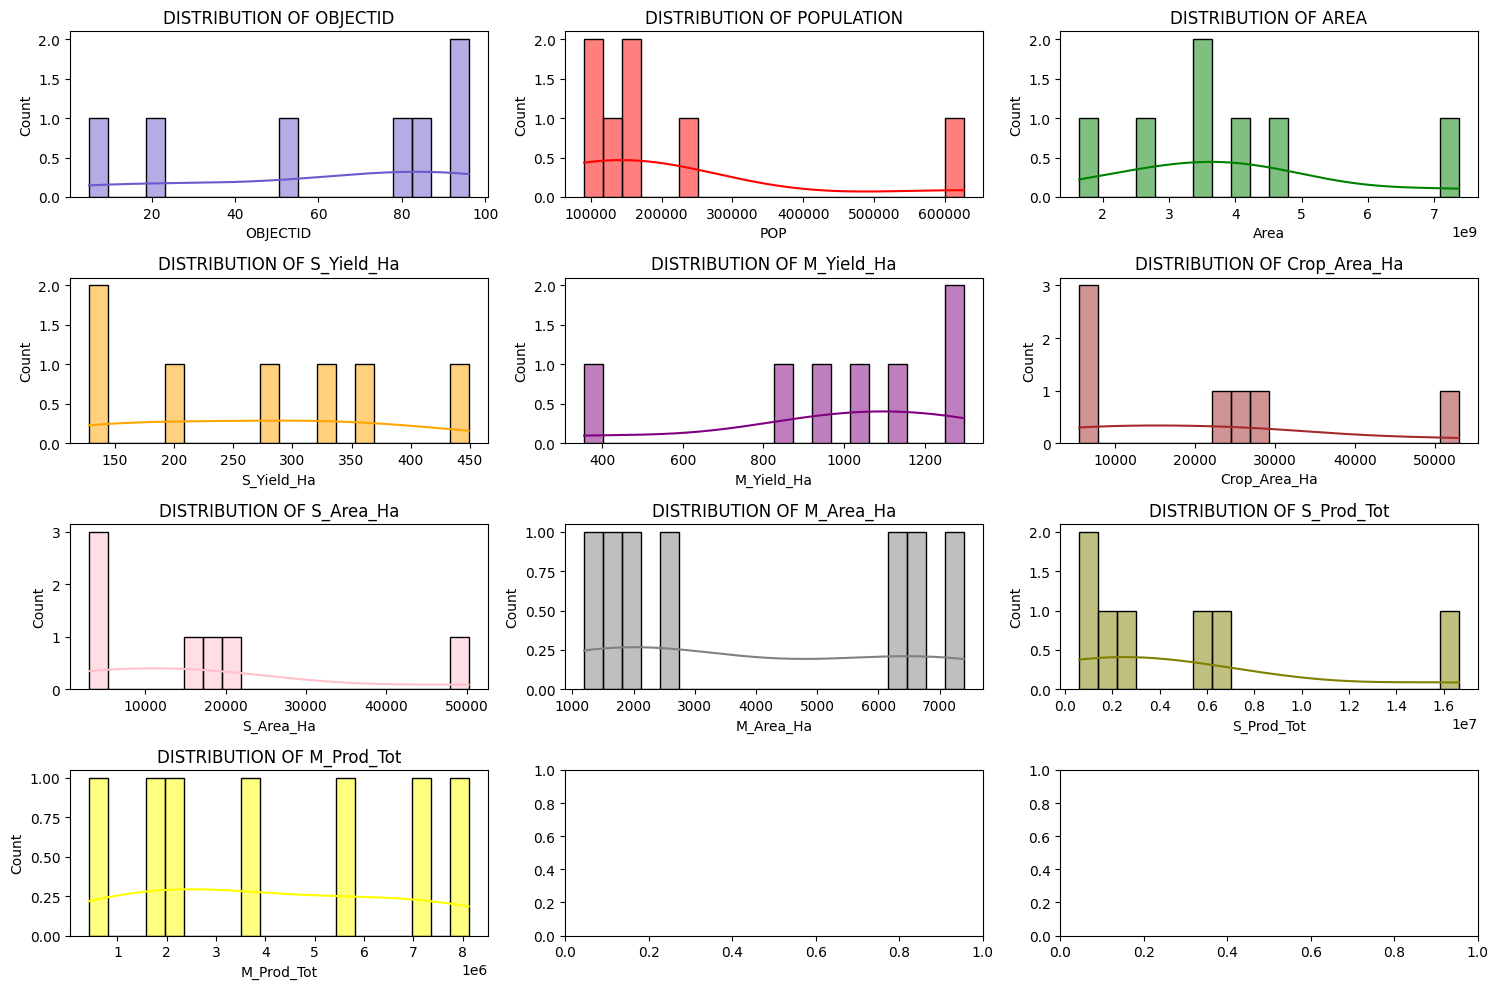

In [ ]:
fig,axes = plt.subplots(4,3, figsize=(15,10))
sns.histplot(district_csv['OBJECTID'],ax=axes[0,0], kde=True, bins=20, color='slateblue')
axes[0,0].set_title('DISTRIBUTION OF OBJECTID')
sns.histplot(district_csv['POP'],ax=axes[0,1], kde=True, bins=20, color='red')
axes[0,1].set_title('DISTRIBUTION OF POPULATION')
sns.histplot(district_csv['Area'],ax=axes[0,2], kde=True, bins=20, color='green')
axes[0,2].set_title('DISTRIBUTION OF AREA')
sns.histplot(district_csv['S_Yield_Ha'],ax=axes[1,0], kde=True, bins=20, color='orange')
axes[1,0].set_title('DISTRIBUTION OF S_Yield_Ha')
sns.histplot(district_csv['M_Yield_Ha'],ax=axes[1,1], kde=True, bins=20, color='purple')
axes[1,1].set_title('DISTRIBUTION OF M_Yield_Ha')
sns.histplot(district_csv['Crop_Area_Ha'],ax=axes[1,2], kde=True, bins=20, color='brown')
axes[1,2].set_title('DISTRIBUTION OF Crop_Area_Ha')
sns.histplot(district_csv['S_Area_Ha'],ax=axes[2,0], kde=True, bins=20, color='pink')
axes[2,0].set_title('DISTRIBUTION OF S_Area_Ha')
sns.histplot(district_csv['M_Area_Ha'],ax=axes[2,1], kde=True, bins=20, color='grey')
axes[2,1].set_title('DISTRIBUTION OF M_Area_Ha')
sns.histplot(district_csv['S_Prod_Tot'],ax=axes[2,2], kde=True, bins=20, color='olive')
axes[2,2].set_title('DISTRIBUTION OF S_Prod_Tot')
sns.histplot(district_csv['M_Prod_Tot'],ax=axes[3,0], kde=True, bins=20, color='yellow')
axes[3,0].set_title('DISTRIBUTION OF M_Prod_Tot')

plt.tight_layout()
plt.show()

**Conclusion:**
* **OBJECTID:** The distribution appears relatively uniform across the bins, suggesting a somewhat even spread of Object IDs.
* **POP:** The population distribution is skewed to the right, with most districts having smaller populations and one or two districts having significantly larger populations.
* **Area:** The distribution of area is also skewed to the right, indicating that most districts have smaller areas, with a few districts being considerably larger.
* **S_Yield_Ha:** The sorghum yield per hectare seems to have a spread-out distribution, with one peak.
* **M_Yield_Ha:** The maize yield per hectare appears to have a few clusters of values, with some districts having lower yields and others having higher yields.
* **Crop_Area_Ha:**  The total crop area per hectare is heavily skewed to the right, indicating that most districts have a smaller area under cultivation, while a few districts have a much larger crop area.
* **S_Area_Ha:** Similar to crop area, the sorghum area per hectare is skewed to the right, with most districts having smaller sorghum cultivation areas and a few having much larger areas.
* **M_Area_Ha:** The maize area per hectare is also skewed to the right, indicating that most districts have smaller maize cultivation areas, and a few have larger areas.
* **S_Prod_Tot:** Total sorghum production is strongly skewed to the right, with most districts having lower production and a few having much higher production.
* **M_Prod_Tot:** Most districts having lower production and a few having higher production.

### Bar Plots for District Data

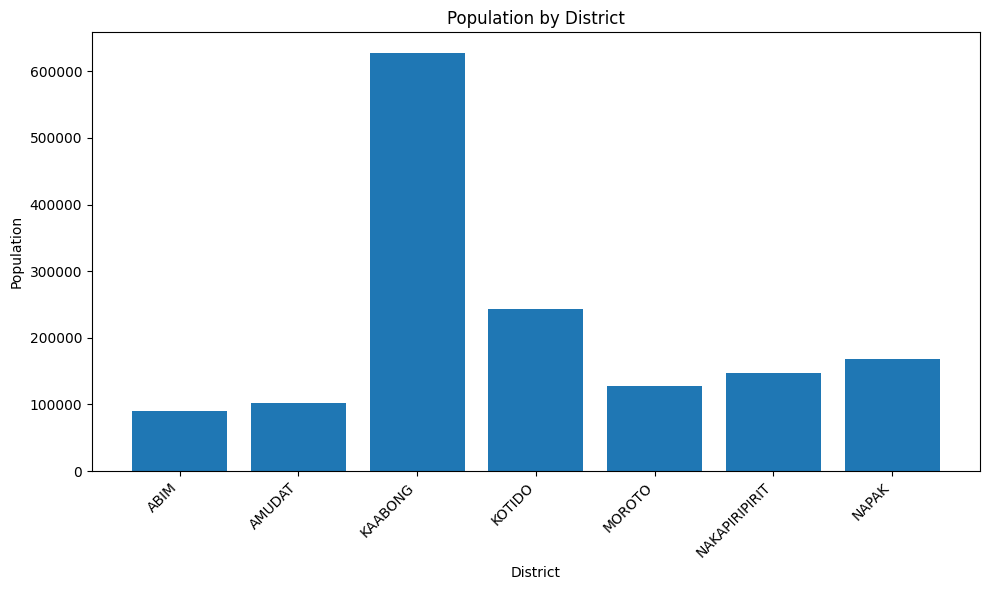

In [ ]:
# Bar plot for Population by District
plt.figure(figsize=(10, 6))
plt.bar(district_csv['NAME'], district_csv['POP'])
plt.xlabel('District')
plt.ylabel('Population')
plt.title('Population by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion:**
* **Population by District:** The bar plot shows that KAABONG district has a significantly higher population compared to all other districts. KOTIDO also has a notable population, while the remaining districts have relatively lower population.


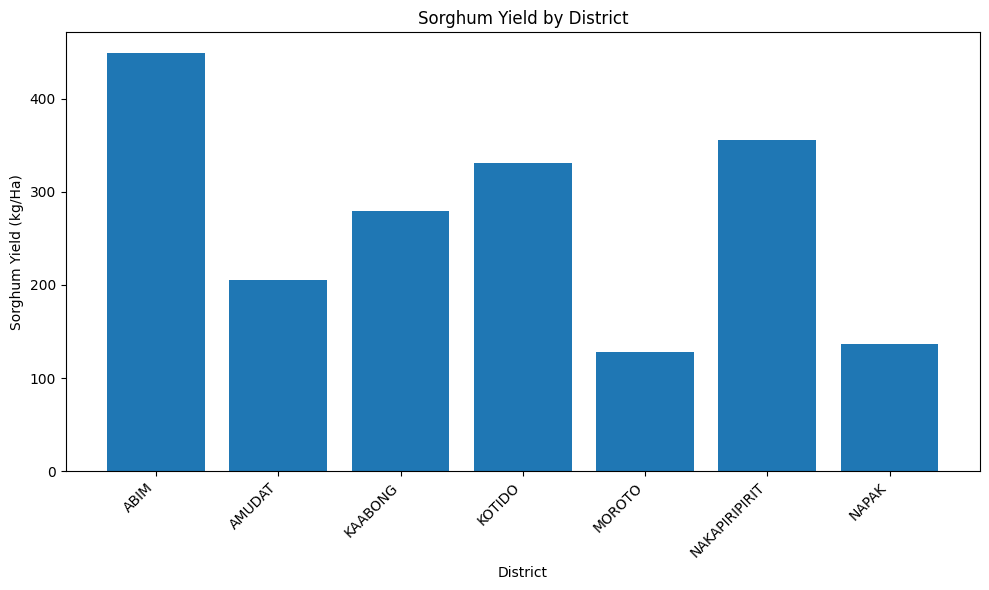

In [ ]:
# Bar plot for Sorghum Yield by District
plt.figure(figsize=(10, 6))
plt.bar(district_csv['NAME'], district_csv['S_Yield_Ha'])
plt.xlabel('District')
plt.ylabel('Sorghum Yield (kg/Ha)')
plt.title('Sorghum Yield by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion:**
* **Sorghum Yield by District** The bar plot for sorghum yield shows ABIM district has the highest sorghum yield per hectare, while MOROTO and NAPAK districts have the lowest.


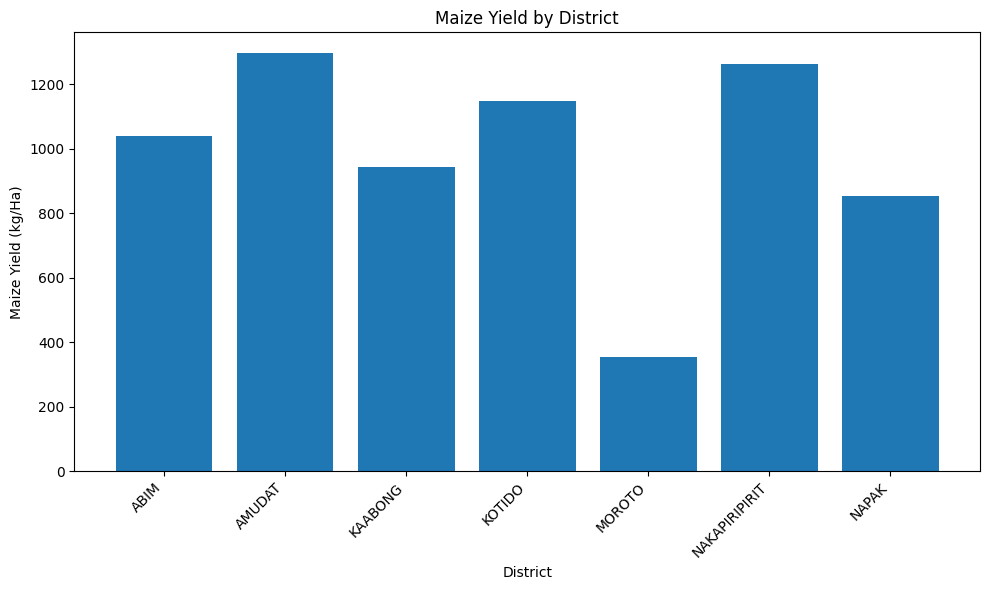

In [ ]:
# Bar plot for Maize Yield by District
plt.figure(figsize=(10, 6))
plt.bar(district_csv['NAME'], district_csv['M_Yield_Ha'])
plt.xlabel('District')
plt.ylabel('Maize Yield (kg/Ha)')
plt.title('Maize Yield by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion:**

* **Maize Yield by District:** The bar plot for maize yield shows AMUDAT and NAKAPIRIPIRIT districts have relatively high maize yields, while MOROTO has the lowest maize yield per hectare.

### Scatter Plots for District Data

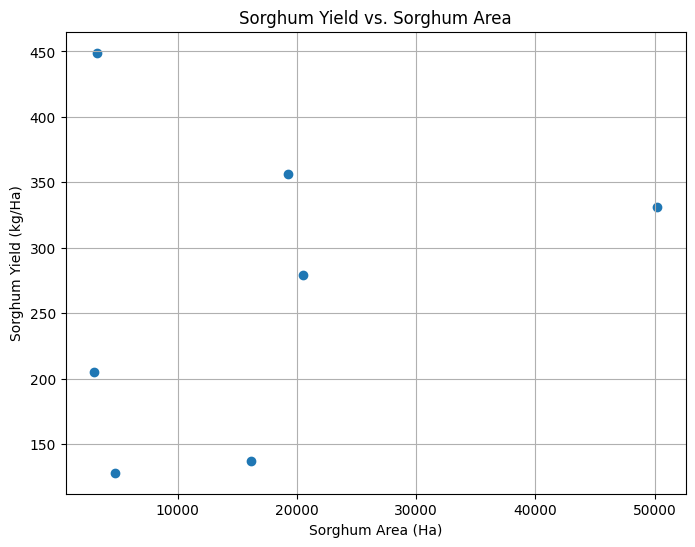

In [ ]:
# Scatter plot of Sorghum Yield vs. Sorghum Area
plt.figure(figsize=(8, 6))
plt.scatter(district_csv['S_Area_Ha'], district_csv['S_Yield_Ha'])
plt.xlabel('Sorghum Area (Ha)')
plt.ylabel('Sorghum Yield (kg/Ha)')
plt.title('Sorghum Yield vs. Sorghum Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Sorghum Yield vs. Sorghum Area**: This scatter plot does not show a strong linear correlation. The points are scattered, suggesting that a larger area dedicated to sorghum cultivation in a district does not necessarily translate to higher sorghum yield per hectare.

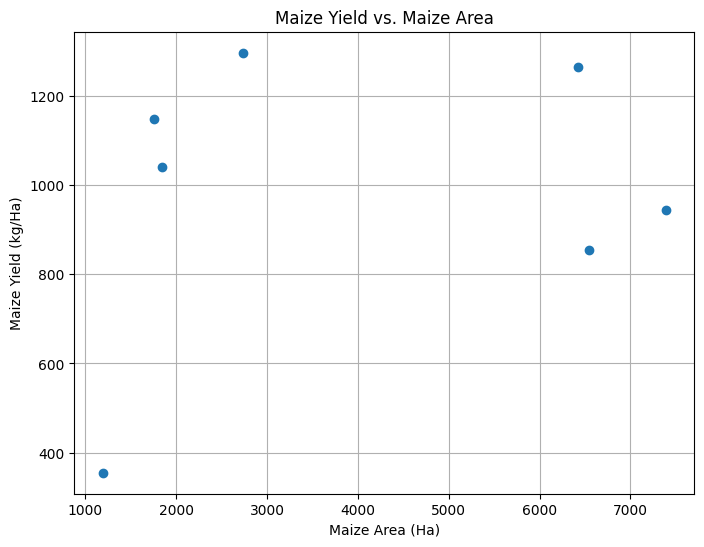

In [ ]:
# Scatter plot of Maize Yield vs. Maize Area
plt.figure(figsize=(8, 6))
plt.scatter(district_csv['M_Area_Ha'], district_csv['M_Yield_Ha'])
plt.xlabel('Maize Area (Ha)')
plt.ylabel('Maize Yield (kg/Ha)')
plt.title('Maize Yield vs. Maize Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Maize Yield vs. Maize Area:** The points in this scatter plot are spread out, indicating that there isn't a strong direct correlation between the area planted with maize and the maize yield per hectare at the district level.

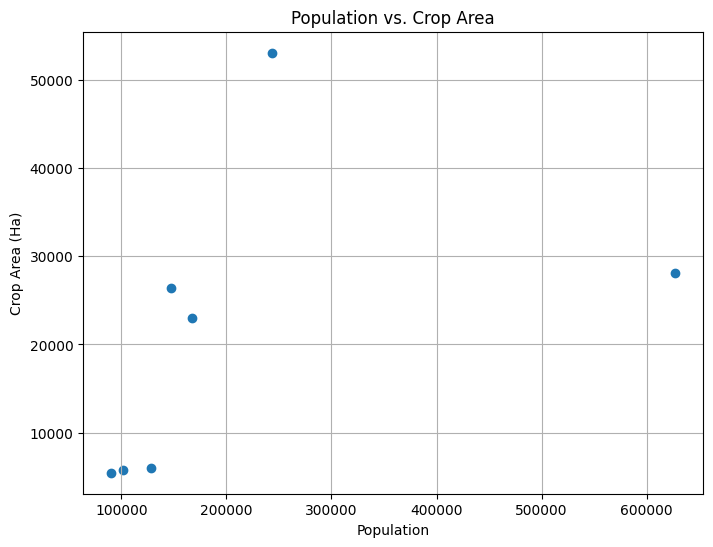

In [ ]:
# Scatter plot of Population vs. Crop Area
plt.figure(figsize=(8, 6))
plt.scatter(district_csv['POP'], district_csv['Crop_Area_Ha'])
plt.xlabel('Population')
plt.ylabel('Crop Area (Ha)')
plt.title('Population vs. Crop Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Population vs. Crop Area:** This scatter plot shows a weak positive trend. Districts with higher populations tend to have larger areas under cultivation, but this relationship is not very strong. This suggests that while population size might be a factor in determining the total crop area, it's not the only factor.

## Histograms for Subcounty Data

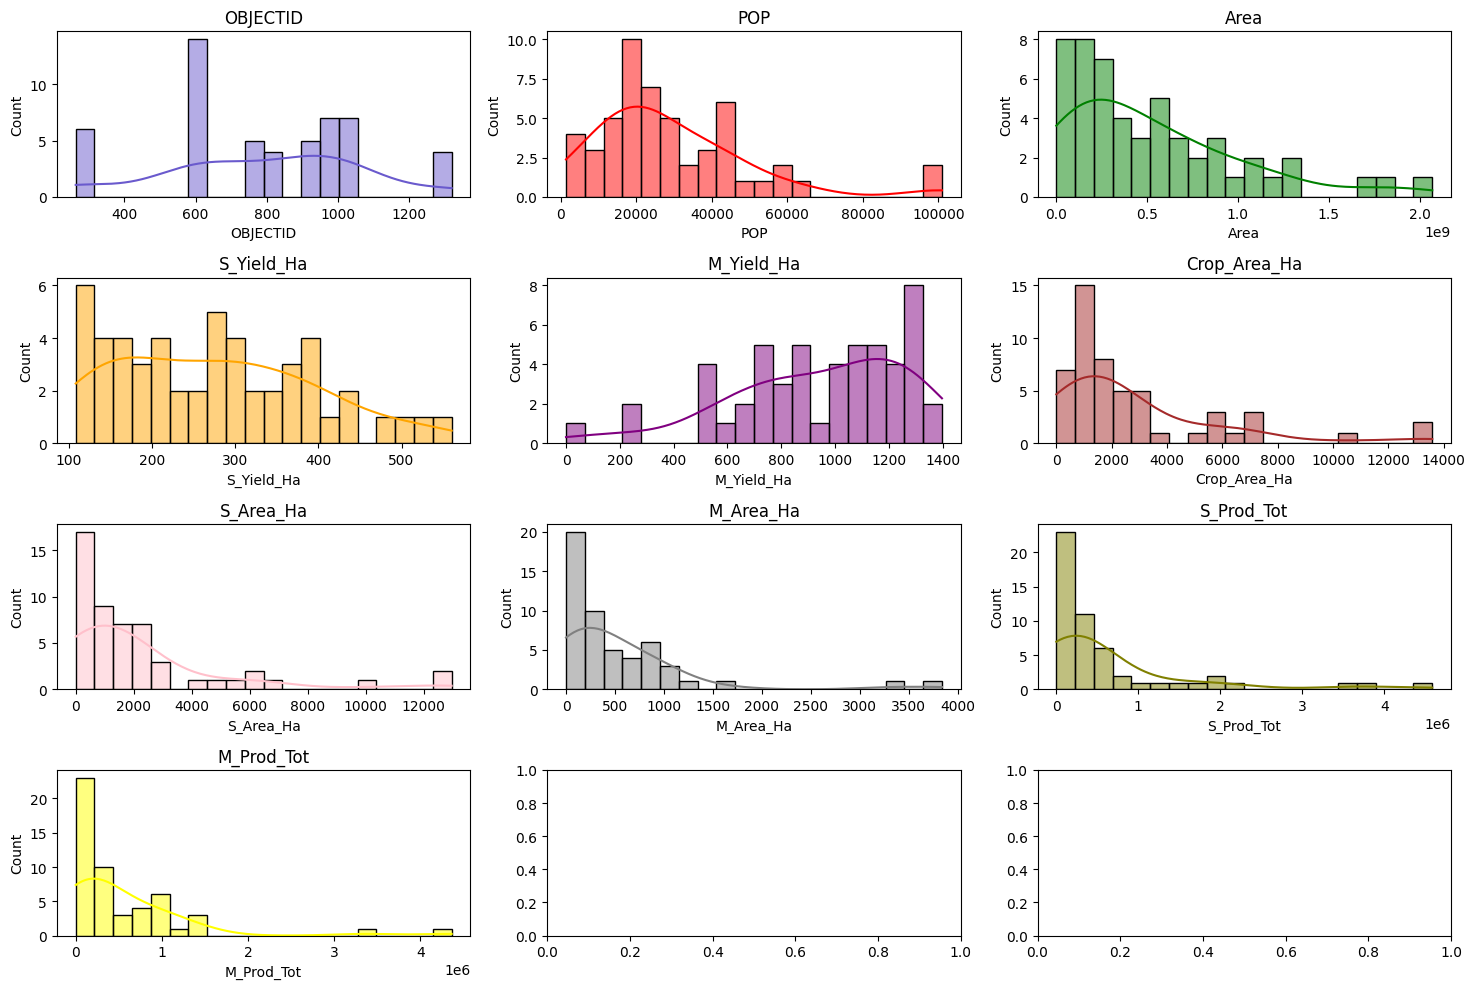

In [ ]:
fig,axes = plt.subplots(4,3, figsize=(15,10))
sns.histplot(subcounty_csv['OBJECTID'],ax=axes[0,0], kde=True, bins=20, color='slateblue')
axes[0,0].set_title('OBJECTID')
sns.histplot(subcounty_csv['POP'],ax=axes[0,1], kde=True, bins=20, color='red')
axes[0,1].set_title('POP')
sns.histplot(subcounty_csv['Area'],ax=axes[0,2], kde=True, bins=20, color='green')
axes[0,2].set_title('Area')
sns.histplot(subcounty_csv['S_Yield_Ha'],ax=axes[1,0], kde=True, bins=20, color='orange')
axes[1,0].set_title('S_Yield_Ha')
sns.histplot(subcounty_csv['M_Yield_Ha'],ax=axes[1,1], kde=True, bins=20, color='purple')
axes[1,1].set_title('M_Yield_Ha')
sns.histplot(subcounty_csv['Crop_Area_Ha'],ax=axes[1,2], kde=True, bins=20, color='brown')
axes[1,2].set_title('Crop_Area_Ha')
sns.histplot(subcounty_csv['S_Area_Ha'],ax=axes[2,0], kde=True, bins=20, color='pink')
axes[2,0].set_title('S_Area_Ha')
sns.histplot(subcounty_csv['M_Area_Ha'],ax=axes[2,1], kde=True, bins=20, color='grey')
axes[2,1].set_title('M_Area_Ha')
sns.histplot(subcounty_csv['S_Prod_Tot'],ax=axes[2,2], kde=True, bins=20, color='olive')
axes[2,2].set_title('S_Prod_Tot')
sns.histplot(subcounty_csv['M_Prod_Tot'],ax=axes[3,0], kde=True, bins=20, color='yellow')
axes[3,0].set_title('M_Prod_Tot')
plt.tight_layout()
plt.show()

**Conclusions from Histograms:**
* **OBJECTID:** The distribution is spread out across the bins, without a clear strong central tendency.
* **POP:** The population distribution for subcounties is heavily skewed to the right. A large number of subcounties have smaller populations, while a few have significantly larger populations. This indicates a wide disparity in population size among the subcounties.
* **Area:** The distribution of area for subcounties is also strongly skewed to the right, with most subcounties having smaller areas and a few having much larger areas.
* **S_Yield_Ha:** The sorghum yield per hectare for subcounties shows a distribution that is spread out, and highly skewed to the right suggesting that lower sorghum yields are more frequent compared to higher yields.
* **M_Yield_Ha:** The maize yield per hectare for subcounties is skewed to the left indicating higher frequency in higher yields. The yield is also shown to be zero indicating no maize cultivation.
* **Crop_Area_Ha:** The total crop area per hectare for subcounties is highly skewed to the right. Most subcounties have a smaller area under cultivation, with a few having considerably larger crop areas.
* **S_Area_Ha:** The sorghum area per hectare for subcounties is strongly skewed to the right, indicating that most subcounties dedicate a smaller area to sorghum, while some have much larger sorghum cultivation areas.
* **M_Area_Ha:** The maize area per hectare for subcounties is heavily skewed to the right, with a large number of subcounties having a small maize cultivation area and a few having much larger areas. The peak at the lowest bin reflects the many subcounties with very small or zero maize area.
* **S_Prod_Tot:** Total sorghum production for subcounties is strongly skewed to the right, with most subcounties having lower production and a few with significantly higher production.
* **M_Prod_Tot:** Total maize production for subcounties is heavily skewed to the right, with most subcounties having lower production and a few with much higher production. The large number of subcounties with very low or zero maize production is shown by the peak at the lowest bin.

### Bar Plots for Subcounty Data

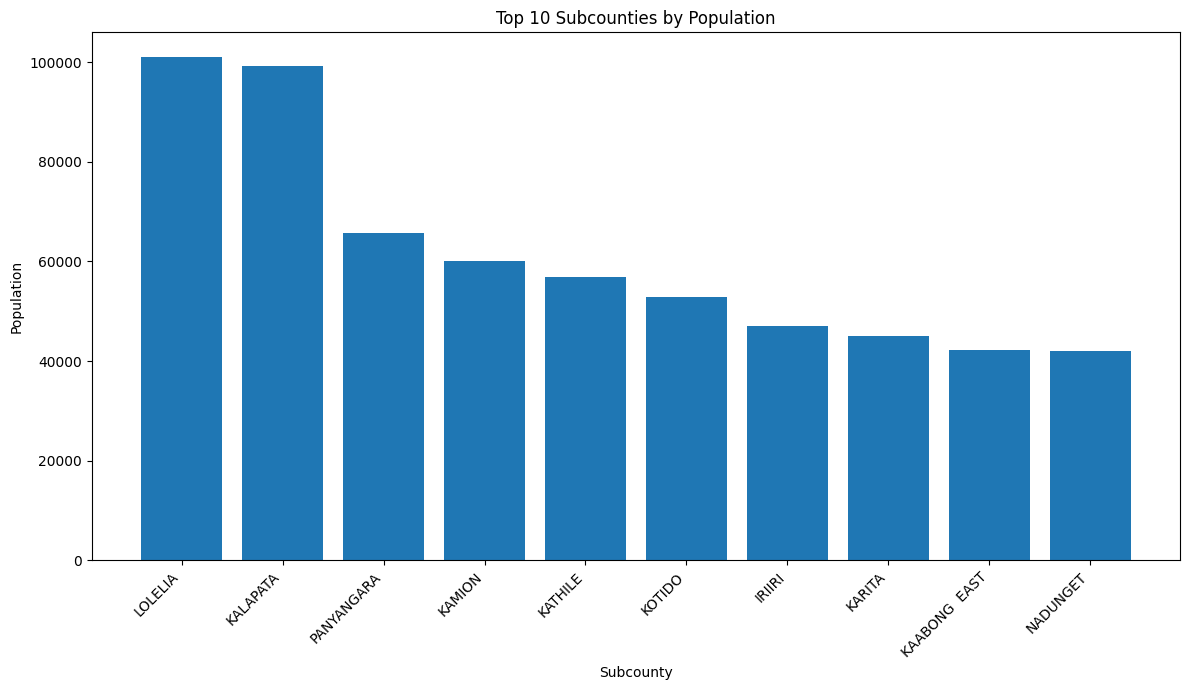

In [ ]:
# Bar plot for Population by Subcounty
# top 10 subcounties by population
top_subcounties_pop = subcounty_csv.nlargest(10, 'POP')

plt.figure(figsize=(12, 7))
plt.bar(top_subcounties_pop['SUBCOUNTY_NAME'], top_subcounties_pop['POP'])
plt.xlabel('Subcounty')
plt.ylabel('Population')
plt.title('Top 10 Subcounties by Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion:
* **Top 10 Subcounties by Population:** The bar plot shows the subcounties with the largest populations. LOLELIA and KALAPATA have the highest populations among the subcounties displayed, significantly larger than some of the others in the top 10.

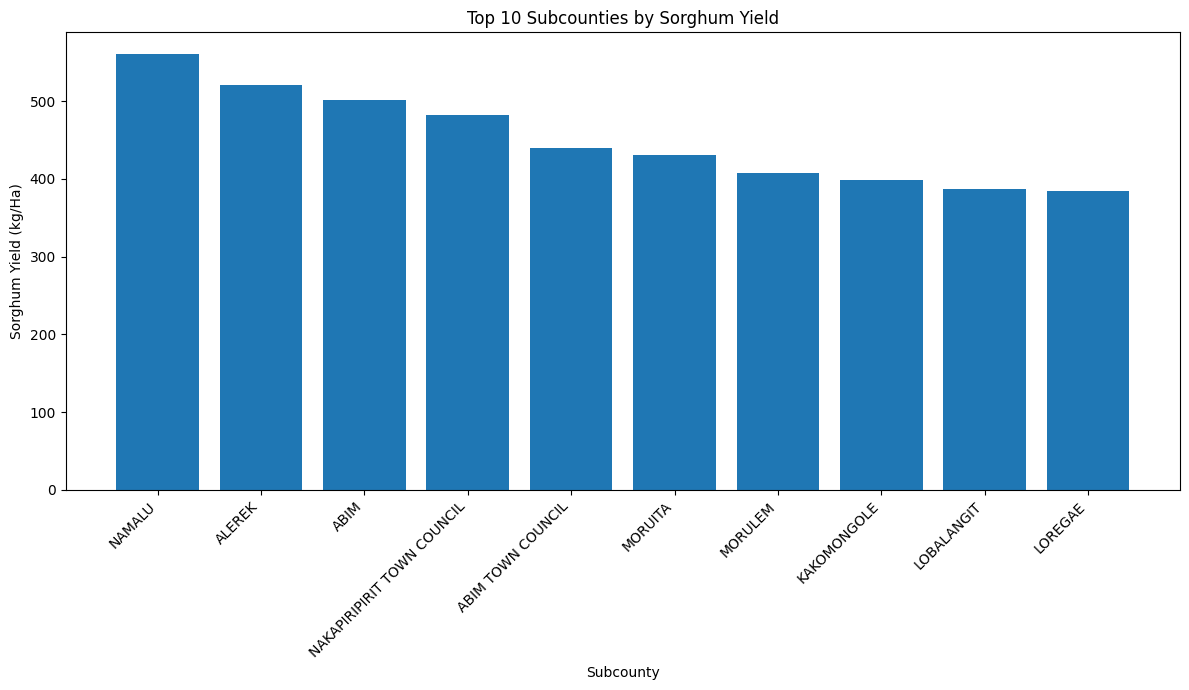

In [ ]:
# Bar plot for Sorghum Yield by Subcounty
# Showing top 10 subcounties by sorghum yield.
top_subcounties_syield = subcounty_csv.nlargest(10, 'S_Yield_Ha')

plt.figure(figsize=(12, 7))
plt.bar(top_subcounties_syield['SUBCOUNTY_NAME'], top_subcounties_syield['S_Yield_Ha'])
plt.xlabel('Subcounty')
plt.ylabel('Sorghum Yield (kg/Ha)')
plt.title('Top 10 Subcounties by Sorghum Yield')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion:**
* **Top 10 Subcounties by Sorghum Yield:** This bar plot highlights the subcounties with the highest sorghum yields per hectare. NAMALU has the highest sorghum yield among these top subcounties, followed by ALEREK and ABIM. The yields among the top subcounties are relatively close, but there are still slight differences.

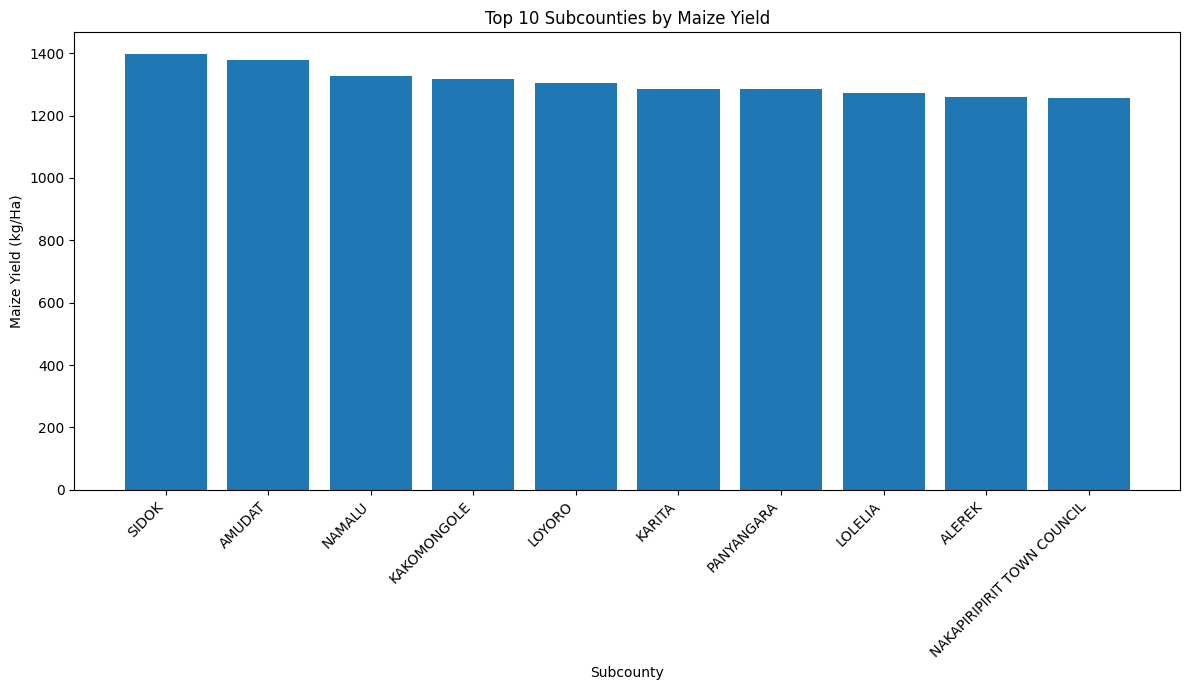

In [ ]:
# Bar plot for Maize Yield by Subcounty
# Showing top 10 subcounties by maize yield.
top_subcounties_myield = subcounty_csv.nlargest(10, 'M_Yield_Ha')

plt.figure(figsize=(12, 7))
plt.bar(top_subcounties_myield['SUBCOUNTY_NAME'], top_subcounties_myield['M_Yield_Ha'])
plt.xlabel('Subcounty')
plt.ylabel('Maize Yield (kg/Ha)')
plt.title('Top 10 Subcounties by Maize Yield')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Conclusion:**
* **Top 10 Subcounties by Maize Yield:** The bar plot for maize yield shows the subcounties with the highest maize yields per hectare. SIDOK and AMUDAT have the highest maize yields among these top subcounties.

### Scatter Plots for Subcounty Data

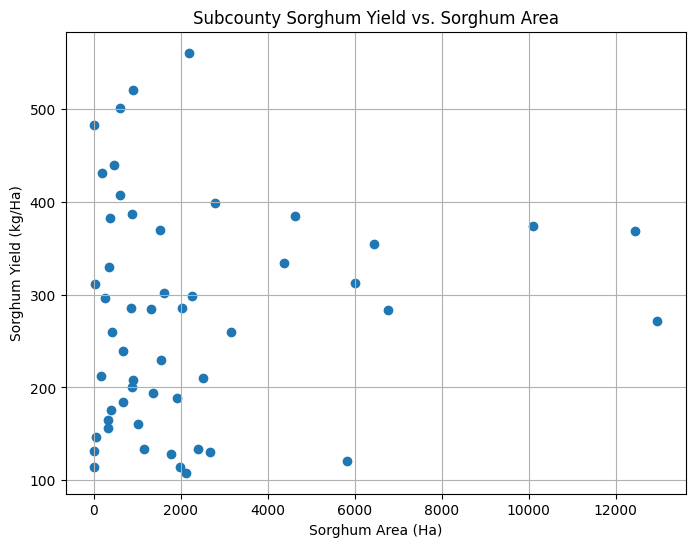

In [ ]:
# Scatter plot of Sorghum Yield vs. Sorghum Area for Subcounties
plt.figure(figsize=(8, 6))
plt.scatter(subcounty_csv['S_Area_Ha'], subcounty_csv['S_Yield_Ha'])
plt.xlabel('Sorghum Area (Ha)')
plt.ylabel('Sorghum Yield (kg/Ha)')
plt.title('Subcounty Sorghum Yield vs. Sorghum Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Subcounty Sorghum Yield vs. Sorghum Area:** The scatter plot shows a wide scatter of points, suggesting no strong linear correlation between the area dedicated to sorghum and the sorghum yield per hectare at the subcounty level. There are subcounties with small sorghum areas but relatively high yields, and others with larger areas but lower yields.

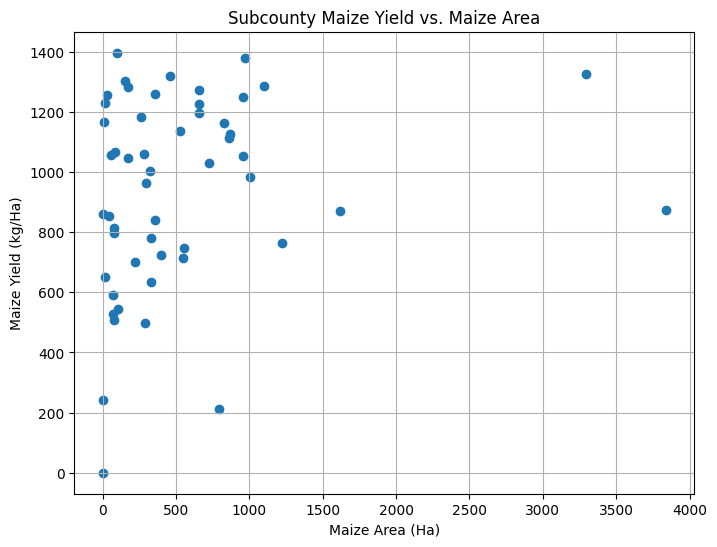

In [ ]:
# Scatter plot of Maize Yield vs. Maize Area for Subcounties
plt.figure(figsize=(8, 6))
plt.scatter(subcounty_csv['M_Area_Ha'], subcounty_csv['M_Yield_Ha'])
plt.xlabel('Maize Area (Ha)')
plt.ylabel('Maize Yield (kg/Ha)')
plt.title('Subcounty Maize Yield vs. Maize Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Subcounty Maize Yield vs. Maize Area:**  The scatter plot of Maize Yield versus Maize Area for subcounties also shows a dispersed pattern. There is no clear linear relationship, indicating that a larger maize cultivation area does not consistently lead to higher maize yields per hectare in the subcounties.
* The points clustered near the y-axis with a maize area close to zero represent subcounties with little to no maize cultivation.

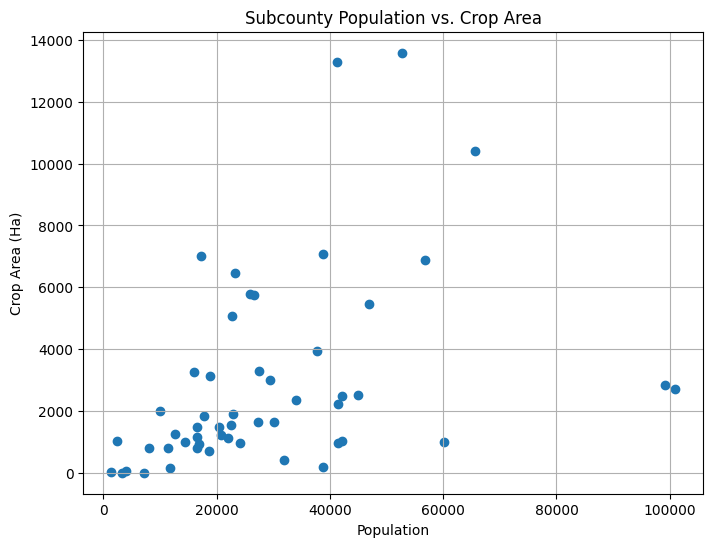

In [ ]:
# Scatter plot of Population vs. Crop Area for Subcounties
plt.figure(figsize=(8, 6))
plt.scatter(subcounty_csv['POP'], subcounty_csv['Crop_Area_Ha'])
plt.xlabel('Population')
plt.ylabel('Crop Area (Ha)')
plt.title('Subcounty Population vs. Crop Area')
plt.grid(True)
plt.show()

**Conclusion:**
* **Subcounty Population vs. Crop Area:** The scatter plot of Subcounty Population versus Crop Area shows a general trend where subcounties with higher populations tend to have larger areas under cultivation. The relationship is not very strong, and there is considerable variability, especially among subcounties with lower populations. Some lower population subcounties have relatively large crop areas, while some higher population subcounties have smaller crop areas than might be expected based on a strong linear relationship.

## Correlation Analysis

District Data correlation

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.474371,-0.602633,0.352307,0.696278,0.079865,0.107743,-0.196739,0.132700,-0.078300
POP,-0.474371,1.000000,0.891900,0.024405,-0.032883,0.424930,0.353520,0.562697,0.300750,0.442555
Area,-0.602633,0.891900,1.000000,-0.036377,-0.212716,0.410245,0.310478,0.729935,0.224938,0.574620
S_Yield_Ha,0.352307,0.024405,-0.036377,1.000000,0.565185,0.206778,0.215317,-0.073130,0.370599,0.104401
M_Yield_Ha,0.696278,-0.032883,-0.212716,0.565185,1.000000,0.300017,0.268343,0.212479,0.356662,0.449512
Crop_Area_Ha,0.079865,0.424930,0.410245,0.206778,0.300017,1.000000,0.988370,0.233298,0.952850,0.252674
S_Area_Ha,0.107743,0.353520,0.310478,0.215317,0.268343,0.988370,1.000000,0.083128,0.976447,0.108703
M_Area_Ha,-0.196739,0.562697,0.729935,-0.073130,0.212479,0.233298,0.083128,1.000000,-0.008665,0.946280
S_Prod_Tot,0.132700,0.300750,0.224938,0.370599,0.356662,0.952850,0.976447,-0.008665,1.000000,0.074169
M_Prod_Tot,-0.078300,0.442555,0.574620,0.104401,0.449512,0.252674,0.108703,0.946280,0.074169,1.000000


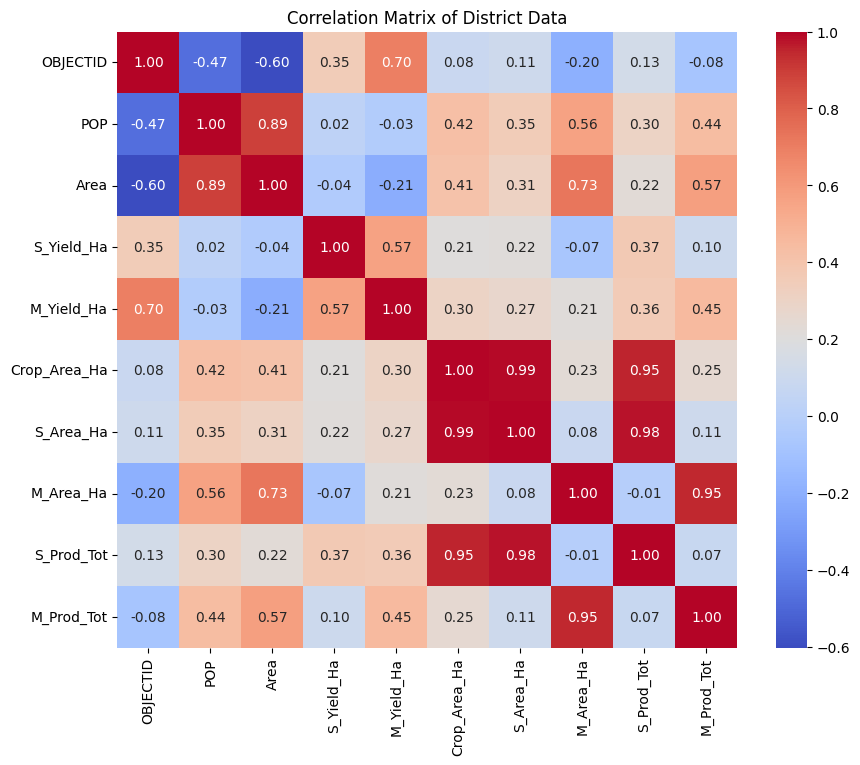

In [ ]:
#correlaion of numerical columns
district_csv_numeric = district_csv.select_dtypes(include=np.number)

# correlation matrix
correlation_matrix = district_csv_numeric.corr()

# Display the correlation matrix
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of District Data')
plt.show()

**Conclusion from correlation heatmap**

**Strong Positive Correlations:**
* POP and Area (0.89): There is a strong positive correlation between the population and the area of the districts. Larger districts tend to have larger populations.
* Crop_Area_Ha and S_Area_Ha (0.99): The total crop area is very strongly positively correlated with the area dedicated to sorghum cultivation.
* Crop_Area_Ha and S_Prod_Tot (0.95): Total crop area is strongly positively correlated with total sorghum production.
* S_Area_Ha and S_Prod_Tot (0.98): The area dedicated to sorghum cultivation is very strongly positively correlated with total sorghum production. This is expected, as more area planted with sorghum should lead to higher total production.
* M_Area_Ha and M_Prod_Tot (0.95): The area dedicated to maize cultivation is strongly positively correlated with total maize production.

**Moderate Positive Correlations:**
* POP and M_Area_Ha (0.56): There is a moderate positive correlation between population and the area dedicated to maize cultivation. More populous districts tend to have larger areas planted with maize.
* Area and M_Area_Ha (0.73): There is a moderately strong positive correlation between the total area of a district and the area dedicated to maize cultivation.
* Area and M_Prod_Tot (0.57): There is a moderate positive correlation between the total area and total maize production.
* S_Yield_Ha and M_Yield_Ha (0.57): There is a moderate positive correlation between sorghum yield and maize yield. Districts with higher sorghum yields tend to have higher maize yields as well.

**Weak or No Significant Correlations:**
* Yields (S_Yield_Ha, M_Yield_Ha) generally have weaker correlations with areas (S_Area_Ha, M_Area_Ha) and production (S_Prod_Tot, M_Prod_Tot). For example, the correlation between S_Yield_Ha and S_Area_Ha is only 0.22, and between M_Yield_Ha and M_Area_Ha is only 0.21.

Subcounty Data Correlation


,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
OBJECTID,1.000000,-0.413025,0.153613,-0.224381,-0.284216,-0.407773,-0.455794,0.135549,-0.528434,0.117310
POP,-0.413025,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350
Area,0.153613,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690
S_Yield_Ha,-0.224381,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797
M_Yield_Ha,-0.284216,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450
Crop_Area_Ha,-0.407773,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030
S_Area_Ha,-0.455794,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947
M_Area_Ha,0.135549,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444
S_Prod_Tot,-0.528434,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794
M_Prod_Tot,0.117310,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000


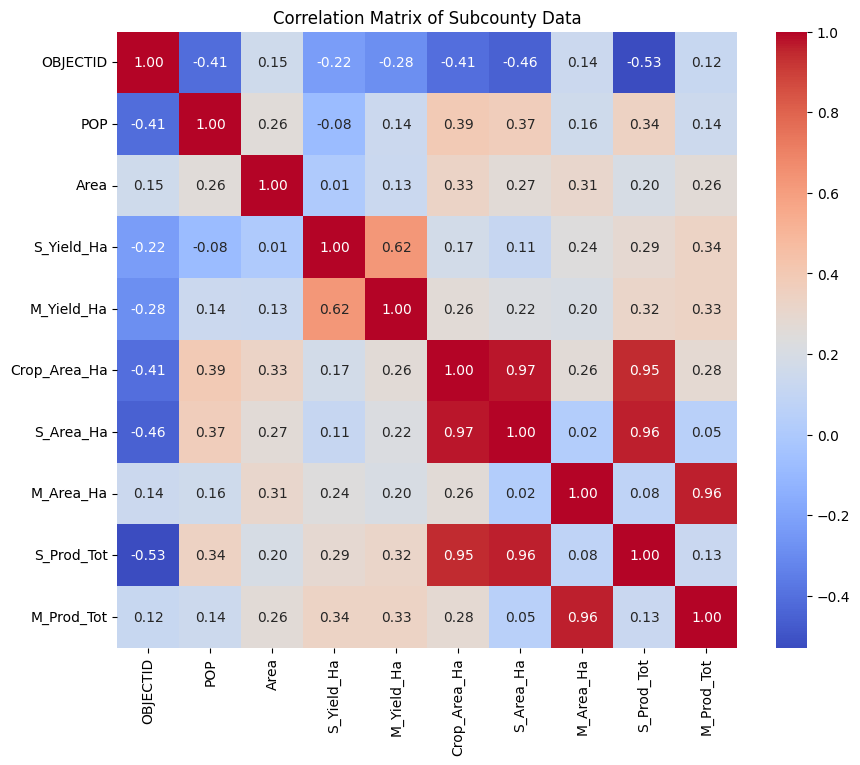

In [ ]:
# only numerical columns
subcounty_csv_numeric = subcounty_csv.select_dtypes(include=np.number)

# correlation matrix
correlation_matrix_subcounty = subcounty_csv_numeric.corr()

# Display the correlation matrix
display(correlation_matrix_subcounty)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subcounty, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Subcounty Data')
plt.show()

**Conclusion from heatmap**

***Strong Positive Correlations:**
* Crop_Area_Ha and S_Area_Ha (0.97): There is a very strong positive correlation between total crop area and sorghum cultivated area in the subcounties. Sorghum cultivation accounts for a large portion of the total crop area at this level as well.
* Crop_Area_Ha and S_Prod_Tot (0.95): Total crop area is strongly positively correlated with total sorghum production at the subcounty level.
* S_Area_Ha and S_Prod_Tot (0.96): The area dedicated to sorghum cultivation is very strongly positively correlated with total sorghum production in the subcounties, as expected.
* M_Area_Ha and M_Prod_Tot (0.96): The area dedicated to maize cultivation is strongly positively correlated with total maize production at the subcounty level.

**Moderate Positive Correlations:**
* S_Yield_Ha and M_Yield_Ha (0.62): There is a moderate positive correlation between sorghum yield and maize yield in subcounties. Subcounties with higher sorghum yields tend to have higher maize yields.
* POP and Crop_Area_Ha (0.39): There is a moderate positive correlation between population and total crop area. More populous subcounties tend to have larger crop areas, but the relationship is less pronounced.
* POP and S_Area_Ha (0.37): There is a moderate positive correlation between population and sorghum cultivated area.
* Area and M_Area_Ha (0.31): There is a weak to moderate positive correlation between the total area of a subcounty and the area dedicated to maize cultivation. This correlation is weaker than the corresponding one at the district level.

**Weak or No Significant Correlations:**
* The correlations between yield per hectare (S_Yield_Ha, M_Yield_Ha) and cultivated area (S_Area_Ha, M_Area_Ha) are relatively weak (e.g., S_Yield_Ha and S_Area_Ha is 0.11, M_Yield_Ha and M_Area_Ha is 0.20).


**Comparison between correlations of district data and subcounty data.**
* The subcounty-level correlations show similar patterns to the district level regarding the strong positive relationships between cultivated areas and total production for both crops, and between total crop area and sorghum area/production.
* The correlation between sorghum and maize yields is slightly stronger at the subcounty level. However, the correlations between population, total subcounty area, and cultivated areas are generally weaker compared to the district level.
 * The weak correlations between yield and cultivated area persist at the subcounty level, indicating that other factors are likely influencing crop yields.

## **Key Findings**
* Both district and subcounty data show significant variability in key metrics like population, area, crop areas, and production. Many of these variables exhibit right-skewed distributions, indicating that a few districts or subcounties have much higher values compared to the majority.
* At both district and subconty levels, there are some areas with significantly higher populations and larger areas than others. (For instance, KAABONG district stands out in terms of population, and at the subcounty level, LOLELIA and KALAPATA have the highest populations among the top subcounties).
* Crop yields (sorghum and maize per hectare) vary across districts and subcounties. Some areas show higher yields than others (e.g. ABIM for sorghum and AMUDAT/NAKAPIRIPIRIT for maize at the district level; NAMALU for sorghum and SIDOK/AMUDAT for maize among the top subcounties).
* There are strong positive correlations between the cultivated area for a crop (sorghum or maize) and the total production of that crop at both district and subcounty levels. This is an expected relationship, a larger area planted generally leads to more total produce. Sorghum cultivation accounts for a large portion of the total crop area.
* While there's a moderate positive correlation between population and crop area and sorghum/maize area at the district level, this relationship is weaker at the subcounty level. The correlation between total area and cultivated area also exists but is not extremely strong, particularly for maize at the subcounty level.
* Weak correlation between yield per hectare and cultivated area.
* There is a moderate positive correlation between sorghum and maize yields, suggesting that areas favorable for one crop's yield might also be favorable for the other.

## **Recommendations**
* **Focus interventions on areas with low yields:** Identify the districts and subcounties with consistently low sorghum and maize yields. These areas could be prioritized for interventions aimed at improving agricultural practices, providing access to better seeds or fertilizers, or implementing irrigation techniques to boost yield per hectare.
* **Investigate factors influencing yield beyond cultivated area:** Since the correlation between cultivated area and yield is weak, further investigation is needed to understand what other factors are limiting or promoting high yields in different areas. This could involve collecting or analyzing data on soil quality, rainfall patterns, farming techniques, pest and disease incidence, or access to resources and markets. This is crucial for developing effective strategies to improve food security.
* **Consider population density and food needs in relation to crop production:** Analyze population distribution in conjunction with crop production to identify areas with high populations but relatively low total production. These areas might be particularly vulnerable to food insecurity and require targeted support. Merging population data with production data can better account for production deficit.
* **Develop a monitoring system that incorporates key indicators:** For the food security monitoring tool, incorporate key indicators identified in this analysis (e.g., crop yields, cultivated areas, total production, and population) and potentially others (like market prices, rainfall data).


## **Next Steps**

Based on the initial data exploration, the next steps could include:

1.  **Further data preparation/feature engineering:** DDI should perform any necessary data transformation, or feature engineering based on the insights gained from the exploration.
2.  **Spatial analysis:** DDI should conduct spatial analysis to identify patterns, clusters, or spatial relationships in the data that might be relevant to food security. This will likely require finding a way to link the spatial data ('district_shp', 'subcounty_shp', 'crop_map_maize', 'crop_map_sorghum') with the tabular data ('district_csv', 'subcounty_csv').
3.  **Develop the interactive visualization tool:** Begin building the interactive visualization tool as requested in the business problem, incorporating the analyzed data and insights.

By considering the recommendations and further analysis of spatial data and other factors, Dalberg Data Insights can begin to develop the Food Security Monitoring tool.